In [1]:
import sys
import os
sys.path.append("../")
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Ingestion

In [2]:
from setting import influx_setting_KETI as ins
from clust.ingestion.influx import influx_Client_v2 as influx_Client

DBClient = influx_Client.influxClient(ins.CLUSTDataServer)
db_name = 'air_indoor_경로당'
ms_list = DBClient.measurement_list(db_name)
ms_name = ms_list[0]

num = "20000"
input_data = DBClient.get_datafront_by_num(num, db_name, ms_name) 
# input_data

/home/jwmoon/.local/lib/python3.8/site-packages/influxdb_client/client/warnings.py:31: MissingPivotFunction: The query doesn't contains the pivot() function.

The result will not be shaped to optimal processing by pandas.DataFrame. Use the pivot() function by:

    import "influxdata/influxdb/schema" schema.measurements(bucket: "air_indoor_경로당") |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")

You can disable this warning by:
    import warnings
    from influxdb_client.client.warnings import MissingPivotFunction

    warnings.simplefilter("ignore", MissingPivotFunction)

For more info see:
    - https://docs.influxdata.com/resources/videos/pivots-in-flux/
    - https://docs.influxdata.com/flux/latest/stdlib/universe/pivot/
    - https://docs.influxdata.com/flux/latest/stdlib/influxdata/influxdb/schema/fieldsascols/

  warnings.warn(message, MissingPivotFunction)


### 1-1. Data Exploration

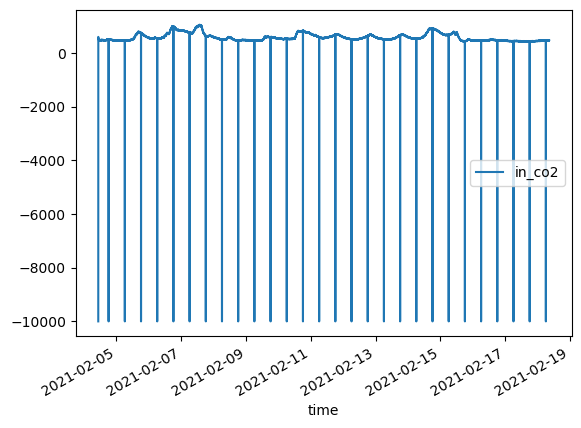

In [3]:
feature_list = input_data.columns
feature = [feature_list[0]]
input_data = input_data[feature]
input_data.plot()
plt.show()

In [4]:
import missingno as msno
msno.matrix(input_data)
input_data.isna().sum()

in_co2    0
dtype: int64

In [5]:
from Clust.clust.preprocessing.errorDetection import errorToNaN
from Clust.clust.ingestion.mongo import mongoClient
mongo_client = mongoClient.mongoClient(ins.CLUSTMetaInfo2)
from Clust.clust.meta.metaDataManager import bucketMeta

#사용자가 원하는 민맥스
min_max_from_user ={"max_num":{"Humidity" : 700,"Temperature" : 700}, 
                    "min_num":{'RichHumidity':-70, 'comp_temp':-70}
                   }

#db에서 가져온 데이터로 만든 민맥스
min_max_from_db = bucketMeta.get_min_max_info_from_bucketMeta(mongo_client, db_name)
#db에서 가져온 데이터로 만든 민맥스를 사용자가 원하는 민맥스로 업데이트                                                                 
data_min_max_limit = bucketMeta.update_old_dict_with_new_dict(min_max_from_db, min_max_from_user)

CertainParam= {'flag': True, 'data_min_max_limit':data_min_max_limit}
datawithMoreCertainNaN = errorToNaN.errorToNaN().getDataWithCertainNaN(input_data, CertainParam)

print(input_data)

                           in_co2
time                             
2021-02-04 10:33:00+00:00 -9999.0
2021-02-04 10:34:00+00:00   552.0
2021-02-04 10:35:00+00:00   597.0
2021-02-04 10:36:00+00:00   540.0
2021-02-04 10:37:00+00:00   521.0
...                           ...
2021-02-18 08:37:00+00:00   460.0
2021-02-18 08:38:00+00:00   466.0
2021-02-18 08:39:00+00:00   467.0
2021-02-18 08:40:00+00:00   459.0
2021-02-18 08:41:00+00:00   466.0

[20000 rows x 1 columns]


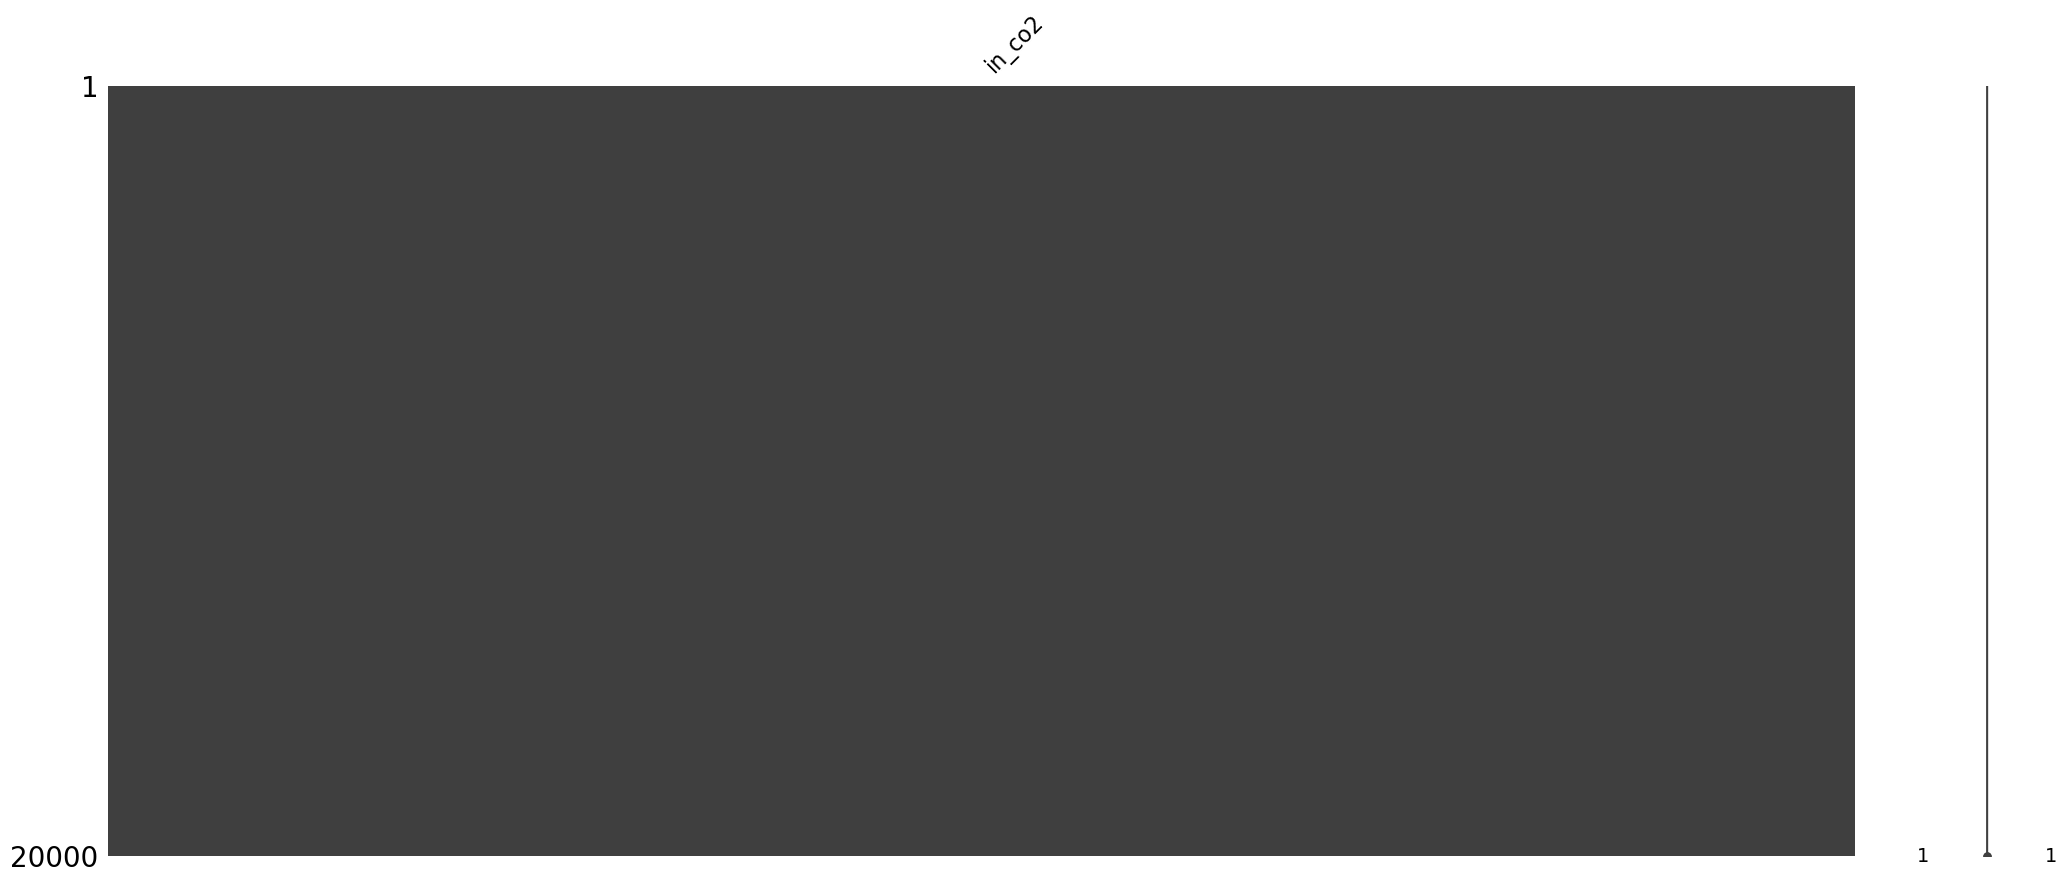

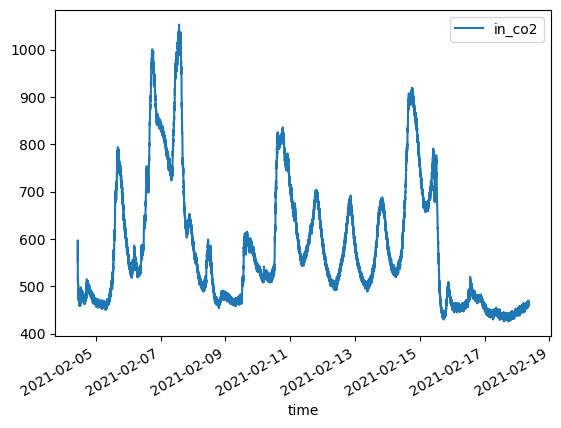

In [6]:
datawithMoreCertainNaN.plot()
plt.show()